<a href="https://colab.research.google.com/github/AIofHuman/deep_learning_2018-19/blob/master/%5Bhomework%2C_base%5D4_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Базовый поток</b></h3>

<h2 style="text-align: center;"><b>Домашнее задание 3. Производная, градиент и градиентный спуск.
</b></h2>

In [0]:
import numpy as np

## Задание 1 ##

__Напоминание:__
Если вдруг вы не помните определение производной, то вот оно:

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{x-x_0}$$

Если такой предел существует, то и производная существует (и равна этому пределу).

Какие из перечисленных функций имеют производную в нуле $(x_0 = 0)$?

1) $f(x) = |x|^2$

2) $f(x) = \frac{sin(x)}{x}$

3) $f(x) = |x|$

4) $f(x) = 
     \begin{cases}
       x^2 &\text{$x \ne 0$}\\
       0 &\text{$x = 0$}
     \end{cases}$

**Ответ:**

## Задание 2 ##

Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$

Тут надо действовать хитро. По определению взять не получится.

Ответ округлите до десятых.

**Ответ:**

## Задание 3 ##

Вычислите производную $f(x)=tg(x)⋅ln(cos(x^2)+1)$, в точке $x_0 = 0$

**Ответ:**

## Задание 4 ##

Предположим, у вас есть функция, и вы бы хотели знать ее производную, но у вас нет аналитического выражения для нее.

Ваше задание написать функцию, которая будет вычислять производную ... *кхм* функции. Тавтология это не очень приятно, но я думаю, что Вы поняли что нужно делать.

Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически. 

Попробуйте это сделать **приближенно**.

In [0]:
def numerical_derivative(func):
    # func: float -> float
    # yes, you need to return another function - deriv_func: float -> float
    # which will compute derivative at any given point
    def deriv_func(x):
        #x: float
        h = 0.00001
        return (func(x + h) - func(x))/h
        #return (func(float(x) + float(x) * h) - func(x))/h
        
    return deriv_func

In [8]:
def polynom_to_prime(x):
    return 20*x**5 + x**3 - 5*x**2 + 2*x + 2.0

def primed_poly(x):
    return 100*x**4 + 3*x**2 -10*x + 2.0

derivative_func = numerical_derivative(polynom_to_prime)
start = -2.0
step = 4/100.0
right_flag = True
debug_print = []
for i in range(100):
    if abs(primed_poly(start) - derivative_func(start)) > 0.05:
        debug_print.append((abs(primed_poly(start) - derivative_func(start)), \
                            primed_poly(start), derivative_func(start)))
        right_flag = False
    start += step
    
print(str(right_flag))

True


In [9]:
def polynom_to_prime(x):
    return x**2

def primed_poly(x):
    return x**2

derivative_func = numerical_derivative(polynom_to_prime)
start = -2.0
step = 4/100.0
right_flag = True
debug_print = []
primed_poly(start)
print(derivative_func(start))


-3.999990000025377


## Задание 5 ##

В этом задании Вы должны найти минимум функций с помощью градиентного спуска.

Вам на вход подаются функция `func` и ее производная `deriv` **(*)**, на выходе - точка локального минимума.

Также вы можете использовать стартовую точку `good_point` как начало спуска.

**(*)** - вам не нужно будет ее вычислять. То, что вы написали в предыдущем задании, вам пригодится чуть позже.

In [0]:
def grad_descent(func, deriv, good_point):
    # func: float -> float - function to minimize
    # deriv: float -> float - derivative of f
    # good_point: float - a good starting point
    start = good_point
    h = 0.01
    x = start
    for i in range(0,1000):
        y = func(x)
        if deriv(x) > 0: x = x - h
        else: x = x + h
        y1 = func(x)
        if abs(y-y1) < 0.00001: break
    return x

In [29]:
grad_descent(lambda x: (x - 1)**4,lambda x: 4*(x - 1)**3,1.0)

1.01

In [30]:
import numpy as np
test_samples = {"square": (lambda x: x*x, lambda x: 2*x, 0.0),
               "module": (lambda x: abs(x), lambda x: 1 if x > 0 else -1, 0.0),
               "forth_power": (lambda x: (x - 1)**4, lambda x: 4*(x - 1)**3, 1.0),
               "ln_x2_1": (lambda x: np.log((x + 1)**2 + 1), lambda x: 2*(x+ 1)/(x**2 +1), -1.0)
               }

right_flag = True
for key in test_samples.keys():
    (function, derivative, answer)= test_samples[key]
    res_point = grad_descent(function, derivative, 2.0)
    if abs(answer - res_point) > 0.1:
        print(str(answer))
        right_flag = False
    
print(right_flag)

True


## Задание 6 ##

Это задание чуть сложнее. Если раньше Вам нужно было просто найти минимум у довольно хорошей функции, то сейчас в тестах будут плохие. У них будет несколько минимумов и вам нужно найти глобальный у каждой функции.

В общем случае такая задача невыполнима, но у вас будут одномерные функции и все самое интересное будет сосредоточено в районе нуля. Скажем, глобальный минимум будет лежать в пределах `(-3, 3)`. Вам нужно как-то изменить градиентный спуск, который вы написали в предыдущем задании, чтобы он работал и в таком случае.

In [0]:
def grad_descent(func, deriv):
    # func: float -> float - function to minimize
    # deriv: float -> float - its derivative
    start = 1
    h = 0.01
    x = start
    for i in range(0,1000):
        y = func(x)
        if deriv(x) > 0: x = x - h
        else: x = x + h
        y1 = func(x)
        if (abs(y-y1) < 0.0000001) & ((x > -3.0) & (x < 3.0)): break
    return x

In [67]:
grad_descent(lambda x: x**4 + 3*x**3 + x**2 - 1.5* x + 1, lambda x: 4*x**3 + 9*x**2 + 2*x - 1.5)

1

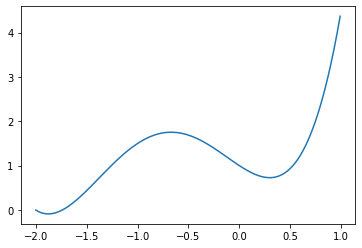

In [63]:
import matplotlib.pyplot as plt
def fun1(x):
  return x**4 + 3*x**3 + x**2 - 1.5*x + 1
X = np.arange(-2.0,1.0,0.01,dtype=float)
plt.plot(X, [x**4 + 3*x**3 + x**2 - 1.5*x + 1 for x in X])
plt.show()

In [39]:
dataset = {
        "poly1": (lambda x: x**4 + 3*x**3 + x**2 - 1.5* x + 1,
                  lambda x: 4*x**3 + 9*x**2 + 2*x - 1.5,
                  -1.88),
        "poly2": (lambda x: x**4 + 3*x**3 + x**2 - 2* x + 1.0,
                 lambda x: 4*x**3 + 9*x**2 + 2*x - 2.0, 
                 0.352),
        "poly3": (lambda x: x**6 + 3*x**3 + x**2 - 2* x + 1.0,
                 lambda x: 6*x**5 + 9*x**2 + 2*x - 2.0, 
                 0.368)
}

right_flag = True
debug_print = []
for key in dataset.keys():
    sample = dataset[key]
    result = grad_descent(sample[0], sample[1])
    answer = sample[2]
    debug_print.append((result, answer))
    if abs(result - answer) > 0.05:
        print(answer)
        right_flag = False
        
print(right_flag)


-1.88
False


## Задание 7 ##

А теперь все вместе!

У вас есть только функция, которую Вам отдают в качестве аргумента и вы должны найти её минимум.

Вы будете искать глобальный, у вас это должно получиться лишь потому что тут они хорошие.

Да, и еще, теперь они не одномерные, а двумерные.

Минимум нужно искать где-то на $\Omega = (-5, 5) \times (-5, 5)$

***Подсказка*** можете использовать следующие параметры:

* Точность при вычислении производной $dx = 10^{-10}$
* Критерий остановки - близость к ответу $\delta = 10^{-10}$ и кол-во итераций $10^4$
* Длина шага градиентного спуска $lr = 1$

In [0]:
def num_deriv(func):
    # your code here
    # note that func is R^2->R, implemented as np.ndarray -> float

def grad_descent(func):
    # your code here
    # you need to return numpy array as a result, because func is (float, float) -> float,
    # and it is implemented as: np.ndarray -> float
    # first element of np.ndarray is the first argument and second is the second argument

In [0]:
func = lambda x, y: -1/((x - 1)**2 + (y - 1.5)**2 + 1)*np.cos(2*(x - 1)**2 + 2*(y - 1.5)**2)
def np_func(v):
    return func(v[0], v[1])
        

point = np.array([1, 1.5])
res_point = grad_descent(np_func)
if np.linalg.norm(res_point - point) < 0.1:
    print('True')
else:
    print('False | ' + str(np.linalg.norm(res_point - point)) + " too far from minimum.")

## Задание 8 ##

В лекции было несколько функций, чьи градиенты Вам было предложено вычислить.

Вычислите градиент следующей функции:

$\psi(x,y,z) = sin(xz) - y^2z + e^x$

Запишите ответ в виде строки "$(\psi_{x}^{'})*i + (\psi_{y}^{'})*j + (\psi_{z}^{'})*k$", где вместо $\psi_{x}^{'}, \psi_{y}^{'}, \psi_{z}^{'}$  подставьте вычисленные частные производные (компоненты градиента). 

Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e". 

Примеры записи формул можно увидеть в ячейках текста задания.

**Ответ:**

## Задание 9 ##

Еще один градиент, похожий на тот, что был на лекции:

$\psi(x,y,z) = ln(cos(e^{x+y})) - ln(xy)$ 

Запишите ответ в виде строки "$(\psi_{x}^{'})*i + (\psi_{y}^{'})*j + (\psi_{z}^{'})*k$", где вместо $\psi_{x}^{'}, \psi_{y}^{'}, \psi_{z}^{'}$  подставьте вычисленные частные производные (компоненты градиента). 

Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e". 

Примеры записи формул можно увидеть в ячейках текста задания.

Запишите ответ в виде строки "()*i + ()*j", где вместо ,  подставьте вычисленные производные (компоненты градиента). Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e", "ln", "tg"

**Ответ:**